In [1]:
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import random

from tqdm.notebook import tqdm as log_progress

In [21]:
#load and clean data
data_file_name = "a-great-cloud-of-witnesses-the-catholic-churchs-experience-i.epub.txt"
SEQUENCE_LENGTH = 10 #how many items are fed into the ai per sequence

raw = open("data/" + data_file_name, "r", encoding='utf-8')

lines = []
print("Loading data...")
for line in log_progress(raw):
    if str(line) != '\n':
        lines.append(str(line).lower())

print("Tokenizing...")
#putting the entirety of the input data into one string
text = ""
for line in log_progress(lines):
    text += line
#tokenizer = RegexpTokenizer(r'[a-zA-Z]')
tokenizer = RegexpTokenizer(r'\w+')
tokenized = tokenizer.tokenize(text)

#converting the text into numbers to be processed by the embedding layer of the model
words = [] #one of each word in tokenized will be in here
filtering = lambda x : not x in words #for finding if the word should be added to the words array
find = lambda x : words.index(x) if x in words else -1 #convert each word into a number. -1 means that the item isn't in the vocabulary

print("Finding every unique word...")
for word in log_progress(tokenized):
    if filtering(word):
        words.append(word)

#x data is every single word in the data set, in order
#y data is every single word that comes after the corresponding x value
x = []
y = []
print("Compiling dataset...")
counter = 0
for i in log_progress(range(int(len(tokenized)/SEQUENCE_LENGTH))):
    temp = []
    for j in range(0, SEQUENCE_LENGTH):
        if counter + j >= len(tokenized):
            while len(temp) < SEQUENCE_LENGTH:
                temp.append(0)
            break
        else:
            temp.append(find(tokenized[counter+j]))
    
    counter += SEQUENCE_LENGTH - 1
    x.append(temp)
    
    if counter+SEQUENCE_LENGTH < len(tokenized):
        y.append(find(tokenized[counter+SEQUENCE_LENGTH]))
    else:
        y.append(find(tokenized[0]))

x = np.asarray(x)
y = np.asarray(y)

x = np.reshape(x, (x.shape[0], SEQUENCE_LENGTH, 1))
y = to_categorical(y)

print(x.shape)
print(y.shape)

vocab_size = len(words)

Loading data...



Tokenizing...



Finding every unique word...



Compiling dataset...



(8292, 10, 1)
(8292, 7411)


In [3]:
#create and compile model
model = Sequential()

model.add(Embedding(vocab_size, 24, input_length=SEQUENCE_LENGTH)) #embedding: size of vocabulary, dimension of each value
model.add(LSTM(40, dropout=0.01))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(y.shape[1], activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 32)            248896    
_________________________________________________________________
lstm (LSTM)                  (None, 40)                11680     
_________________________________________________________________
dense (Dense)                (None, 32)                1312      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7411)              244563    
Total params: 506,451
Trainable params: 506,451
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
83/83 [==============================] - 9s 35ms/step - loss: 7.8531 - accuracy: 0.0619
Epoch 2/200
83/83 [==============================] - 3s 34ms/step - loss: 6.4694 - accuracy: 0.0773
Epoch 3/200
83/83 [==============================] - 3s 34ms/step - loss: 6.3694 - accuracy: 0.0773
Epoch 4/200
83/83 [==============================] - 3s 34ms/step - loss: 6.3133 - accuracy: 0.0773
Epoch 5/200
83/83 [==============================] - 3s 34ms/step - loss: 6.2205 - accuracy: 0.0773
Epoch 6/200
83/83 [==============================] - 3s 34ms/step - loss: 6.1228 - accuracy: 0.0773
Epoch 7/200
83/83 [==============================] - 3s 35ms/step - loss: 6.0471 - accuracy: 0.0773
Epoch 8/200
83/83 [==============================] - 3s 34ms/step - loss: 5.9772 - accuracy: 0.0773
Epoch 9/200
83/83 [==============================] - 3s 34ms/step - loss: 5.9168 - accuracy: 0.0772
Epoch 10/200
83/83 [==============================] - 3s 34ms/step - loss: 5.8662 - accuracy: 0.0773

83/83 [==============================] - 3s 34ms/step - loss: 1.5439 - accuracy: 0.6301
Epoch 83/200
83/83 [==============================] - 3s 32ms/step - loss: 1.4955 - accuracy: 0.6454
Epoch 84/200
83/83 [==============================] - 3s 34ms/step - loss: 1.4710 - accuracy: 0.6452
Epoch 85/200
83/83 [==============================] - 3s 35ms/step - loss: 1.4565 - accuracy: 0.6488
Epoch 86/200
83/83 [==============================] - 3s 34ms/step - loss: 1.4030 - accuracy: 0.6646
Epoch 87/200
83/83 [==============================] - 3s 34ms/step - loss: 1.3512 - accuracy: 0.6825
Epoch 88/200
83/83 [==============================] - 3s 34ms/step - loss: 1.2925 - accuracy: 0.6898
Epoch 89/200
83/83 [==============================] - 3s 34ms/step - loss: 1.2699 - accuracy: 0.7071
Epoch 90/200
83/83 [==============================] - 3s 34ms/step - loss: 1.2718 - accuracy: 0.6993
Epoch 91/200
83/83 [==============================] - 3s 34ms/step - loss: 1.2298 - accuracy: 0.7102
Epo

83/83 [==============================] - 3s 35ms/step - loss: 0.2620 - accuracy: 0.9336
Epoch 163/200
83/83 [==============================] - 3s 36ms/step - loss: 0.2629 - accuracy: 0.9333
Epoch 164/200
83/83 [==============================] - 3s 34ms/step - loss: 0.2877 - accuracy: 0.9231
Epoch 165/200
83/83 [==============================] - 3s 35ms/step - loss: 0.2661 - accuracy: 0.9292
Epoch 166/200
83/83 [==============================] - 3s 35ms/step - loss: 0.2710 - accuracy: 0.9310
Epoch 167/200
83/83 [==============================] - 3s 34ms/step - loss: 0.2820 - accuracy: 0.9274
Epoch 168/200
83/83 [==============================] - 3s 34ms/step - loss: 0.2546 - accuracy: 0.9327
Epoch 169/200
83/83 [==============================] - 3s 34ms/step - loss: 0.2634 - accuracy: 0.9307
Epoch 170/200
83/83 [==============================] - 3s 35ms/step - loss: 0.2595 - accuracy: 0.9293
Epoch 171/200
83/83 [==============================] - 3s 34ms/step - loss: 0.2470 - accuracy: 0

KeyError: 'val_loss'

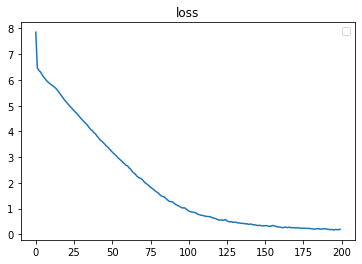

In [4]:
#train model
hist = model.fit(x, y, epochs=200, verbose=1, batch_size=100)
model.save("TestModel.h5")

plt.title("loss")
plt.legend(['loss'])
plt.plot(hist.history['loss'], label='loss')
#plt.plot(hist.history['val_loss'], label='val_loss')

In [20]:
#test model
sample_length = 100
model = load_model("TestModel.h5")

root = [find(random.choice(words)) for i in range(SEQUENCE_LENGTH)]
output = ""

for i in log_progress(range(sample_length)):
    pred = model.predict([root])
    next_word = pred.argmax()
    #next_word = np.random.choice(len(pred[0]), p=pred[0])
    output += words[next_word] + " "
    root.pop(0)
    root.append(next_word) #setting the next word

print(output)

10
10
10
10
10
10
10
10
10
10



ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'numpy.int64\'>"})'}), <class 'NoneType'>